# Latent Semantic Analysis (LSA)
# Topic Modelling and Document Clustering

In this excersise, we mostly rely on sklearn for implementing LSA.

In [17]:
from glob import glob
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

Read 2225 text files, each representing a BBC News article in one of the five categories:
- politics
- sports
- business
- entertainment
- technology

We store all articles in the list `bbcNews`. The category of the articles (one of the five above) is stored in the list `labels`. It is the name of the subfolder of the main folder `bbc`.

In [18]:
bbcNews = []
labels = []
filenames = glob('bbc/*/*.txt')
for filename in filenames:
    file = open(filename, "r+")
    bbcNews.append(file.read().rstrip())
    labels.append(filename[4:filename.find('\\',4)])
    file.close()

In [19]:
len(bbcNews)

2225

Print the first 500 and the last 500 characters of the first article.

In [5]:
print('%s ... %s'%(bbcNews[0][0:499], bbcNews[0][-500:-1]))

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time ... tors. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that st

### Tf-idf Representation

Download a list of stopwords.

In [20]:
nltk.download('stopwords')
stopset = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
vectorizer = TfidfVectorizer(stop_words = stopset, use_idf = True, ngram_range = (1, 3))

In [22]:
X = vectorizer.fit_transform(bbcNews)
X.shape

(2225, 799117)

In [23]:
X[0]

<1x799117 sparse matrix of type '<class 'numpy.float64'>'
	with 703 stored elements in Compressed Sparse Row format>

In [24]:
print(X[0])

  (0, 415204)	0.03725963593542399
  (0, 242478)	0.03725963593542399
  (0, 58742)	0.03725963593542399
  (0, 614223)	0.03725963593542399
  (0, 102083)	0.03725963593542399
  (0, 590923)	0.03725963593542399
  (0, 36644)	0.03725963593542399
  (0, 583727)	0.03725963593542399
  (0, 242615)	0.03725963593542399
  (0, 58743)	0.03725963593542399
  (0, 669710)	0.07451927187084798
  (0, 558830)	0.03725963593542399
  (0, 91097)	0.03725963593542399
  (0, 558133)	0.03725963593542399
  (0, 465885)	0.03725963593542399
  (0, 300178)	0.03725963593542399
  (0, 191203)	0.03725963593542399
  (0, 28953)	0.03725963593542399
  (0, 765341)	0.03725963593542399
  (0, 35084)	0.03725963593542399
  (0, 361609)	0.03725963593542399
  (0, 19880)	0.03725963593542399
  (0, 636403)	0.03725963593542399
  (0, 544255)	0.03725963593542399
  (0, 586153)	0.03725963593542399
  :	:
  (0, 94581)	0.014758095870075075
  (0, 491383)	0.016091330623875636
  (0, 272648)	0.013105484795605358
  (0, 222540)	0.02912048557172368
  (0, 791814)

### Apply TruncatedSVD

In [25]:
svd = TruncatedSVD(n_components=10, n_iter=100)

In [26]:
X_transformed = svd.fit_transform(X)

#U = X_transformed / svd.singular_values_
#S = np.diag(svd.singular_values_)
VT = svd.components_

In [27]:
VT[0]

array([0.00084103, 0.00019696, 0.00019696, ..., 0.00042373, 0.00042373,
       0.00042373])

In [28]:
terms = vectorizer.get_feature_names()
for i, concept in enumerate(VT):
    print("concept %d:" % i)
    termsInConcept = zip(terms, concept)
    sortedTerms = sorted(termsInConcept, key=lambda x : x[1], reverse=True) [:10]
    for term in sortedTerms:
        print("%-15s\t: %f" % (term[0], term[1]))
    print("\n")

concept 0:
said           	: 0.229418
mr             	: 0.193982
would          	: 0.121965
people         	: 0.110995
labour         	: 0.099668
us             	: 0.098457
year           	: 0.096888
new            	: 0.092483
government     	: 0.087836
blair          	: 0.087209


concept 1:
mr             	: 0.254726
labour         	: 0.229276
blair          	: 0.211601
election       	: 0.189516
brown          	: 0.175993
mr blair       	: 0.148236
party          	: 0.147421
mr brown       	: 0.132778
chancellor     	: 0.103372
prime          	: 0.100502


concept 2:
mobile         	: 0.151645
people         	: 0.101019
users          	: 0.098990
phone          	: 0.094253
software       	: 0.090394
technology     	: 0.088450
digital        	: 0.085030
microsoft      	: 0.083601
music          	: 0.080016
net            	: 0.079614


concept 3:
film           	: 0.338744
best           	: 0.235922
awards         	: 0.149917
award          	: 0.125523
actor          	: 0.109777
oscar

### Document Clustering

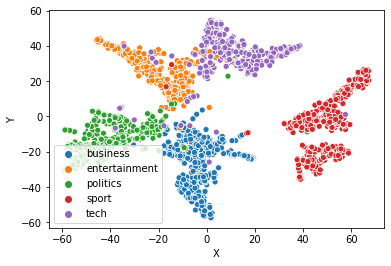

In [29]:
embedding2D_LSA = TSNE(n_components=2).fit_transform(X_transformed)
sns.scatterplot(x="X", y="Y", data=pd.DataFrame(data=embedding2D_LSA, columns=["X", "Y"]), hue=labels)

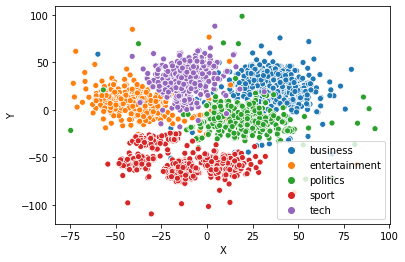

In [30]:
embedding2D_Original = TSNE(n_components=2).fit_transform(X)
sns.scatterplot(x="X", y="Y", data=pd.DataFrame(data=embedding2D_Original, columns=["X", "Y"]), hue=labels)

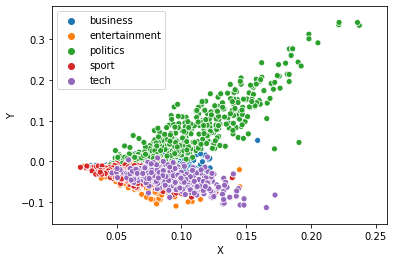

In [31]:
svd2D = TruncatedSVD(n_components=2, n_iter=100)
X_transformed_2D = svd2D.fit_transform(X)
sns.scatterplot(x="X", y="Y", data=pd.DataFrame(data=X_transformed_2D, columns=["X", "Y"]), hue=labels)